# Chute analysis
### By Martin Sanderøy and Kristin Tukun
#### Email martsand@nmbu.no and ktukun@nmbu.no

# -*- coding: utf-8 -*-
"""
Created on Thu Oct 17 12:47:14 2019

@author: Martin Sanderøy and Kristin Tuku

In [29]:
from snakes_and_ladders import multi_game_experiment
import pandas as pd

df_1_player = pd.DataFrame(multi_game_experiment(10000, 1, 1))
df_2_players = pd.DataFrame(multi_game_experiment(10000, 2, 1))
df_4_players = pd.DataFrame(multi_game_experiment(10000, 4, 1))
df_8_players = pd.DataFrame(multi_game_experiment(10000, 8, 1))

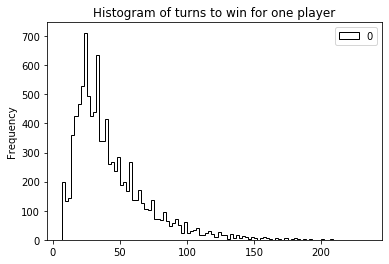

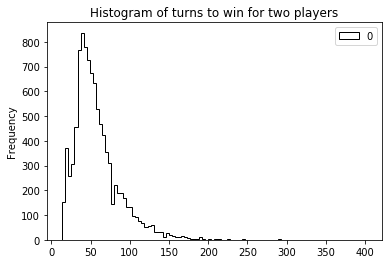

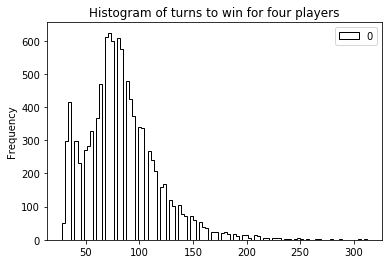

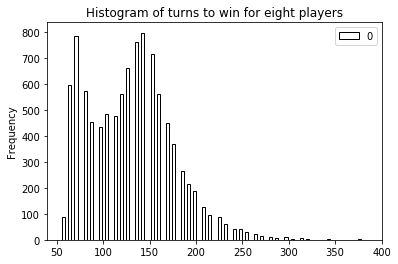

In [30]:
import matplotlib.pyplot as plt

df_1_player.plot.hist(bins = 100, rwidth = 0.9, color = '#000000', histtype = 'step', 
              title = 'Histogram of turns to win for one player')

df_2_players.plot.hist(bins = 100, rwidth = 0.9, color = '#000000', histtype = 'step', 
              title = 'Histogram of turns to win for two players')

df_4_players.plot.hist(bins = 100, rwidth = 0.9, color = '#000000', histtype = 'step', 
              title = 'Histogram of turns to win for four players')

df_8_players.plot.hist(bins = 100, rwidth = 0.9, color = '#000000', histtype = 'step', 
              title = 'Histogram of turns to win for eight players')

plt.show()